<a href="https://hub.play-sydney.neurodesk.org/user/neurodesk-example-notebooks-toudo5lh/lab/workspaces/auto-4/tree/functional%20imaging/fmriprep_example.ipynb" target="_parent"><img src="https://img.shields.io/badge/launch-binder-579aca.svg?logo=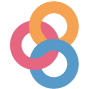" alt="Open In Binder"/>  </a>
<a href="https://colab.research.google.com/github/NeuroDesk/example-notebooks/blob/main/functional%20imaging/fmriprep_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>  </a>

Author: Steffen Bollmann

## Setup Neurodesk

In [2]:
%%capture
import os
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  os.environ["LD_PRELOAD"] = "";
  os.environ["APPTAINER_BINDPATH"] = "/content"
  os.environ["MPLCONFIGDIR"] = "/content/matplotlib-mpldir"
  os.environ["LMOD_CMD"] = "/usr/share/lmod/lmod/libexec/lmod"

  !curl -J -O https://raw.githubusercontent.com/NeuroDesk/neurocommand/main/googlecolab_setup.sh
  !chmod +x googlecolab_setup.sh
  !./googlecolab_setup.sh

  os.environ["MODULEPATH"] = ':'.join(map(str, list(map(lambda x: os.path.join(os.path.abspath('/cvmfs/neurodesk.ardc.edu.au/neurodesk-modules/'), x),os.listdir('/cvmfs/neurodesk.ardc.edu.au/neurodesk-modules/')))))


## Example

In [ ]:
# load fmriprep
import lmod
import os
await lmod.load('fmriprep/22.1.1')
await lmod.list()

['fmriprep/22.1.1']

In [ ]:
%%bash
# Request a freesurfer license and store it in your homedirectory. This is just an exampe - please replace with your license id:
echo "Steffen.Bollmann@cai.uq.edu.au" > ~/.license
echo "21029" >> ~/.license
echo "*Cqyn12sqTCxo" >> ~/.license
echo "FSxgcvGkNR59Y" >> ~/.license

In [ ]:
%%bash
# download data
datalad install https://github.com/OpenNeuroDatasets/ds000102.git
cd ds000102 && datalad get sub-08

install(ok): /content/ds000102 (dataset)
get(ok): sub-08/anat/sub-08_T1w.nii.gz (file) [from s3-PUBLIC...]
get(ok): sub-08/func/sub-08_task-flanker_run-2_bold.nii.gz (file) [from s3-PUBLIC...]
get(ok): sub-08/func/sub-08_task-flanker_run-1_bold.nii.gz (file) [from s3-PUBLIC...]
get(ok): sub-08 (directory)
action summary:
  get (ok: 4)


It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
[INFO] Cloning dataset to <Dataset path=/content/ds000102> 
[INFO] Attempting to clone from https://github.com/OpenNeuroDatasets/ds000102.git to /content/ds000102 
[INFO] Completed clone attempts for <Dataset path=/content/ds000102> 
[INFO]  
[INFO] *** Please tell me who you are. 
[INFO]  
[INFO] Run 
[INFO]  
[INFO]   git config --global user.email "you@example.com" 
[INFO]   git config --global user.name "Your Name" 
[INFO]  
[INFO] to set your account's default identity. 
[INFO] Omit --global to set the identity only in this repository. 
[INFO]  
[INFO] fatal: unable to auto-detect email address (got 'root@fd558dc16c5a.(none)') 
[INFO]   Remote origin not usable by git-annex; setting annex-ignore 
[INFO] access to 1 dataset sibling 

In [ ]:
%%bash
export ITK_GLOBAL_DEFAULT_NUMBER_OF_THREADS=2 # specify the number of threads you want to use
export MPLCONFIGDIR=~/matplotlib-mpldir

fmriprep ds000102/ content/ participant --fs-license-file ~/.license --output-spaces T1w MNI152NLin2009cAsym fsaverage fsnative --participant-label 08 --nprocs $ITK_GLOBAL_DEFAULT_NUMBER_OF_THREADS --mem 10000 --skip_bids_validation -v 